In [1]:
import pandas
import seaborn as sns
from itertools import product
from typing import List

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")


def allocs(*args: List[List[str]]) -> List[str]:
    return ["".join(r) for r in product(*args)]

dir = "out-221021_1644"

# Bulk

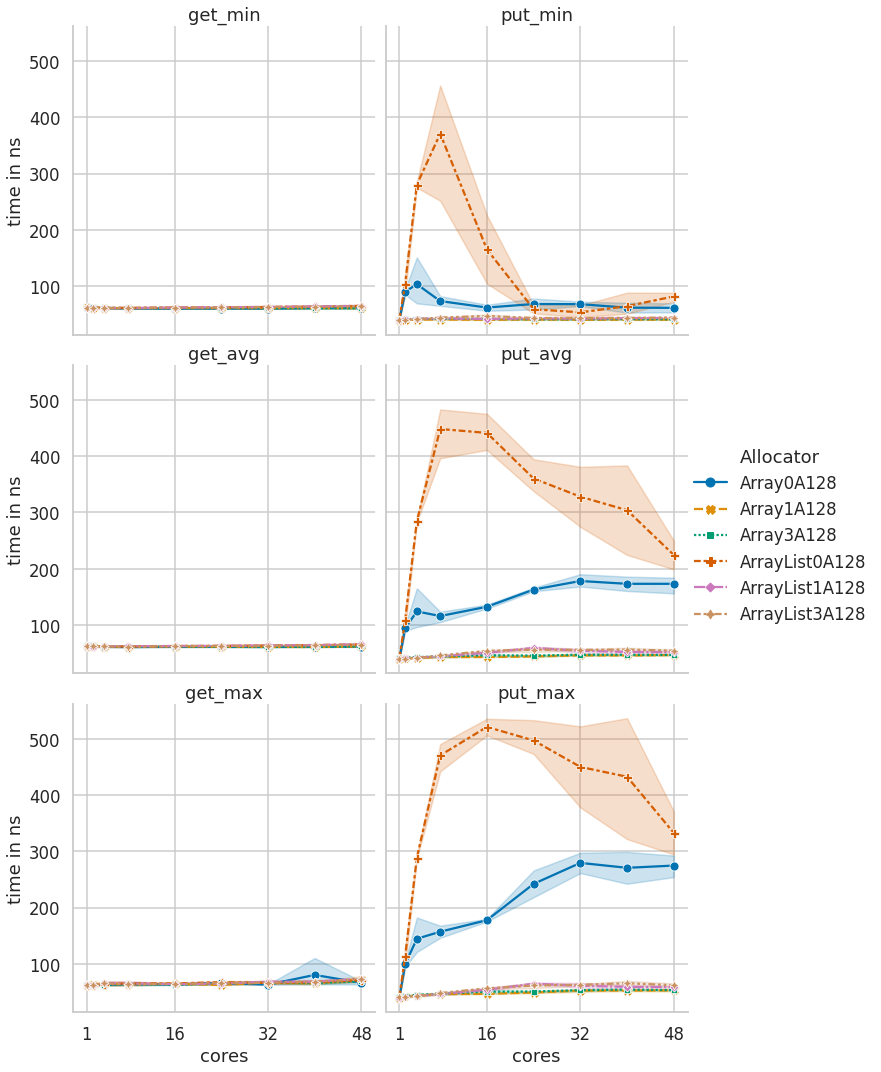

In [2]:
pgd = pandas.read_csv(f"{dir}/bulk_v.csv")
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "get_min", "put_min", "get_avg", "put_avg", "get_max", "put_max"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get_min", "put_min", "get_avg", "put_avg", "get_max", "put_max"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable"]).min()
order = allocs(["Array", "ArrayList"], ["0", "1", "3"], ["A128"])
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order, col_wrap=2)
g.set(xticks=[1, 16, 32, 48])
# g.set(ylim=(0, 200))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


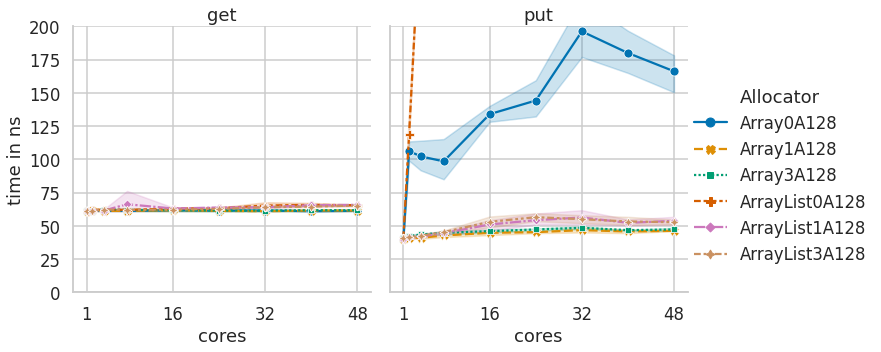

In [3]:
pgd = pandas.read_csv(f"{dir}/bulk_p.csv")
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = allocs(["Array", "ArrayList"], ["0", "1", "3"], ["A128"])
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, 200))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


# Repeat

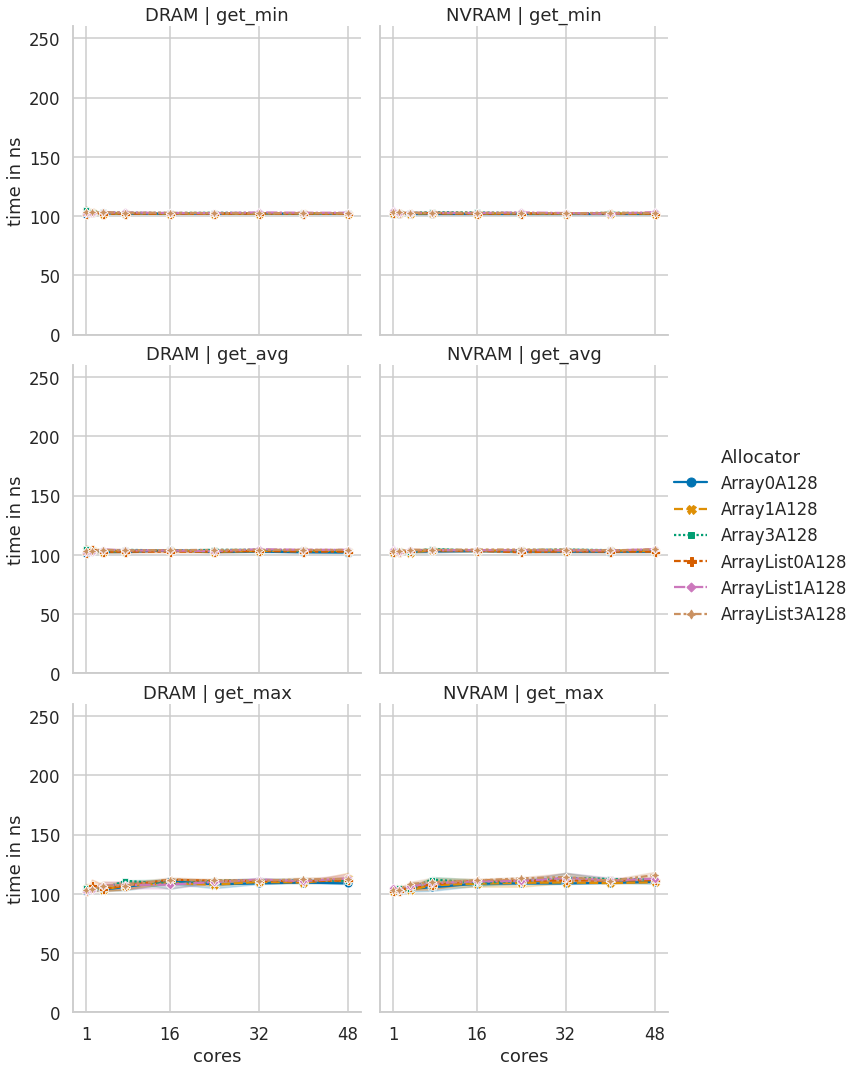

In [4]:
vd = pandas.read_csv(f"{dir}/repeat_v.csv")
vd["mem"] = "DRAM"
pd = pandas.read_csv(f"{dir}/repeat_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "get_min", "get_avg", "get_max", "mem"]].melt(
    id_vars=["cores", "alloc", "mem"],
    value_vars=["get_min", "get_avg", "get_max"], value_name="time")

order = allocs(["Array", "ArrayList"], ["0", "1", "3"], ["A128"])
g = sns.relplot(data=pgd, x="cores", y="time", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem", row="variable",
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, 260))
g.legend.set_title("Allocator")
g.set_titles("{col_name} | {row_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")


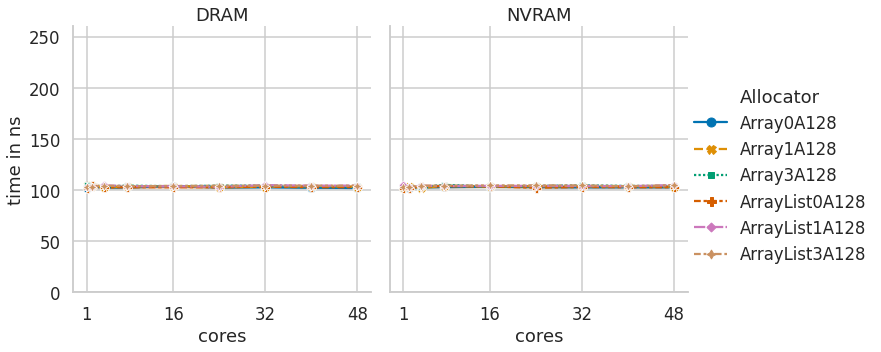

In [5]:
vd = pandas.read_csv(f"{dir}/repeat_v.csv")
vd["mem"] = "DRAM"
pd = pandas.read_csv(f"{dir}/repeat_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

order = allocs(["Array", "ArrayList"], ["0", "1", "3"], ["A128"])
g = sns.relplot(data=pgd, x="cores", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem",
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, 260))
g.legend.set_title("Allocator")
g.set_titles("{col_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")


# Random

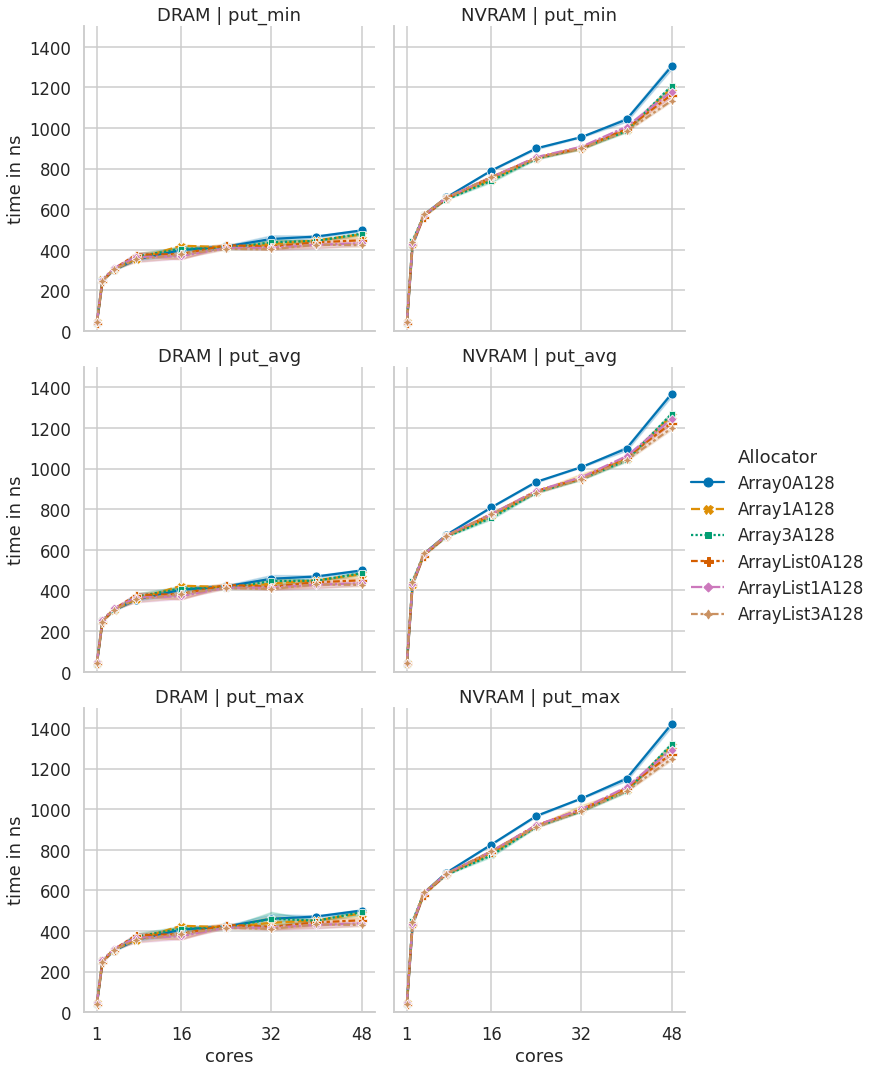

In [6]:
vd = pandas.read_csv(f"{dir}/rand_v.csv")
vd["mem"] = "DRAM"
pd = pandas.read_csv(f"{dir}/rand_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[["cores", "alloc", "put_min", "put_avg", "put_max", "mem"]].melt(
    id_vars=["cores", "alloc", "mem"],
    value_vars=["put_min", "put_avg", "put_max"], value_name="time")

order = allocs(["Array", "ArrayList"], ["0", "1", "3"], ["A128"])
g = sns.relplot(data=pgd, x="cores", y="time", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem", row="variable",
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, 1500))
g.legend.set_title("Allocator")
g.set_titles("{col_name} | {row_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")


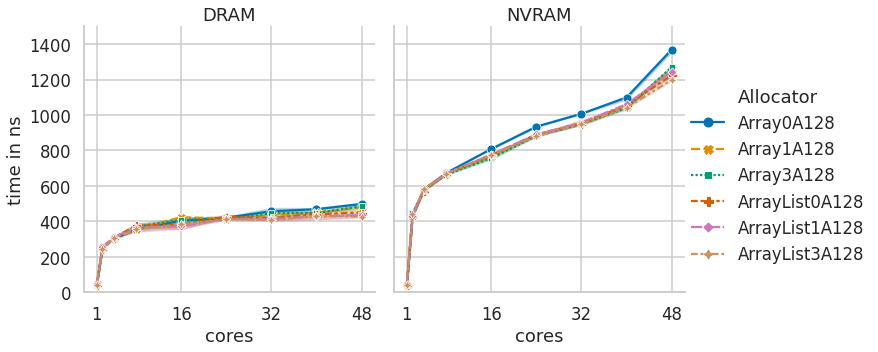

In [7]:
vd = pandas.read_csv(f"{dir}/rand_v.csv")
vd["mem"] = "DRAM"
pd = data = pandas.read_csv(f"{dir}/rand_p.csv")
pd["mem"] = "NVRAM"
data = pandas.concat([vd, pd], ignore_index=True)
data["cores"] = data["x"]

# data = data.groupby(["cores", "alloc", "mem"]).min()
order = allocs(["Array", "ArrayList"], ["0", "1", "3"], ["A128"])
g = sns.relplot(data=data, x="x", y="put_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem",
                style_order=order, hue_order=order)

g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, 1500))
# g.set(xlim=(1, 17))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.set_titles("{col_name}")
